### CIS 9: Lab 3b
Unsupervised Learning: clustering

In [22]:
# Name: Aryan Singhal

In this lab you will work with customer credit card data to group customers into clusters with similar characteristics.<br>
The input data is `cc.csv` ([source](https://www.kaggle.com/datasets/samira1992/credit-card-data-intermediate-dataset/data))

In [23]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


1. Read data from the file `cc.csv` file into a DataFrame.<br>
Then __print the number of rows and columns__ of the DataFrame<br>
and __print the first rows__ of the DataFrame.

In [24]:
df = pd.read_csv('cc.csv')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')
print(df.head())

Number of rows: 8950
Number of columns: 18
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083

---

2. Data Cleaning<br>

2a. __Print the number of NaNs__.<br>
If there are NaNs and their number are small compared with the total number of data records, __drop the NaNs__<br>
and __print the resulting number of rows__.

In [25]:
nan_counts = df.isna().sum().sum()
print(f'Number of NaNs: {nan_counts}')

# Drop rows with NaNs
df = df.dropna()
# Print the resulting number of rows
print(f'Number of rows after dropping NaNs: {df.shape[0]}')

Number of NaNs: 314
Number of rows after dropping NaNs: 8636


2b. __Change the columns labels to lowercase__<br>
then __print the first rows__ of the DataFrame.

In [26]:
df.columns = [col.lower() for col in df.columns]
print("DataFrame after cleaning and updating column labels:")
print(df.head())

DataFrame after cleaning and updating column labels:
  cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                     

---

3. Drop features that are unnecessary, duplicates, or closely related to another feature.<br>
This is an example of dimensionality reduction (but without doing the math).

- `'balance'` is limited by the customer's 'credit limit' and can be dropped.
- `'balance_frequency'` is the rate that the balance is updated by the credit card company. It is not a customer credit card behavior and can be dropped.
- `'purchases'`, `'oneoff_purchases'`, `'installments_purchases'`, and `'cash_advance'` are amounts that are limited by the customer's 'credit limit'. Therefore they can be dropped.
- 'purchases_frequency' and 'purchases_trx' are both measurements of how often the customer makes a purchase, therefore we keep one of them by dropping the `'purchases_frequency'` and keeping the 'purchase_trx', which is the number of purchases in one year.
- 'cash_advance_frequency' and 'cash_advance_trx' are both measurements of how often the customer makes a cash advance, therefore we keep one of them by dropping `'cash_advance_frequency'`, which is the number of cash advances in one year.
- `'oneoff_purchases_frequency'` and `'installments_purchases_frequency'` are already represented by 'purchases_trx', so we drop both of them.
- `'minimum_payments'` and `'payments'` are dependent on the 'balance' and can be dropped.

In addition to the columns highlighted above, there is one more column that should be dropped.<br>
__Determine the additional column to be dropped__,<br>
then __drop the additional column and the columns highlighted above__ and __save the result in a new DataFrame name__ (don't modify the cleaned DataFrame of step 2b above, you'll use it in a later step).<br>
Then __print the first rows__ of the new DataFrame.

In [27]:
# List of columns to drop
columns_to_drop = [
    'balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
    'installments_purchases', 'cash_advance', 'purchases_frequency',
    'oneoff_purchases_frequency', 'purchases_installments_frequency',
    'cash_advance_frequency', 'minimum_payments', 'payments'
]

# Drop customer id
columns_to_drop.append('cust_id')

df_reduced = df.drop(columns=columns_to_drop)

print("DataFrame after dropping unnecessary features:")
print(df_reduced.head())

DataFrame after dropping unnecessary features:
   cash_advance_trx  purchases_trx  credit_limit  prc_full_payment  tenure
0                 0              2        1000.0          0.000000      12
1                 4              0        7000.0          0.222222      12
2                 0             12        7500.0          0.000000      12
4                 0              1        1200.0          0.000000      12
5                 0              8        1800.0          0.000000      12


---

 4. Get an overview of the data.

4a. __Create a plot with 5 subplots to show the data distribution of each column of the DataFrame__ from step 3.<br>
The subplots should be in 2 rows.<br>
Each subplot should have a title that shows which feature is being plotted.<br>

_Use a loop to do the plotting, don't copy and paste the plotting code 5 times_.<br>
_Adjust the subplots so they are spaced apart enough and don't overlap each other._

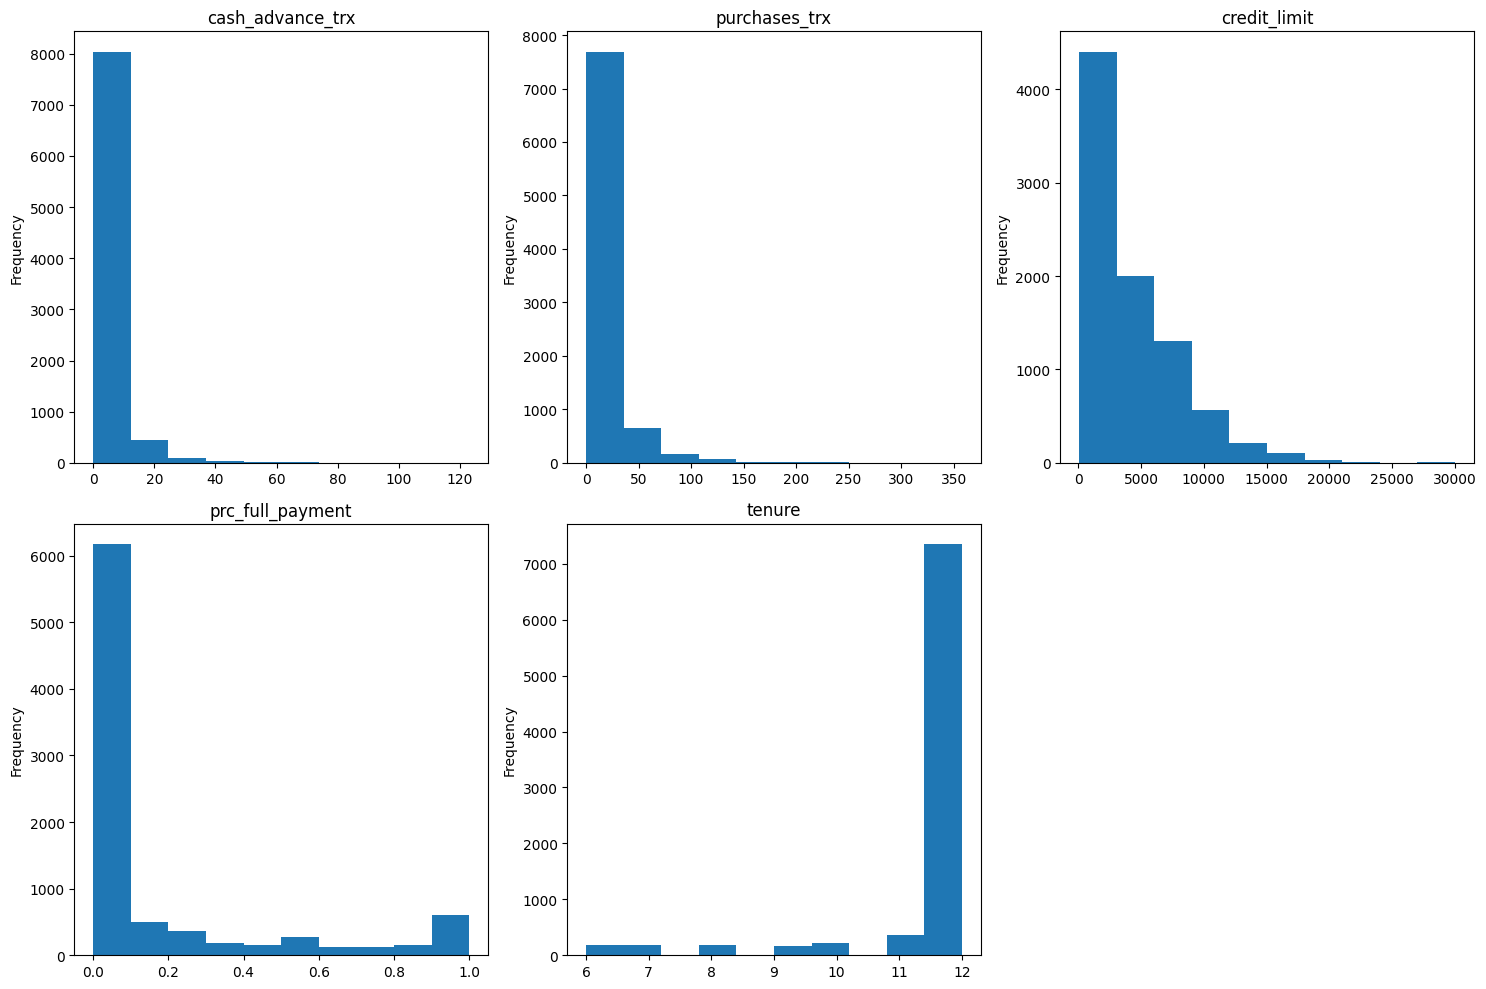

In [28]:
# Ensure there are exactly 5 columns to plot
if len(df_reduced.columns) > 5:
    print("Too many columns left for plotting.")
elif len(df_reduced.columns) < 5:
    print("Not enough columns left for plotting.")
else:
    # Create a plot with 5 subplots to show the data distribution of each column
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    axes = axes.flatten()

    for idx, column in enumerate(df_reduced.columns):
        df_reduced[column].plot(kind='hist', ax=axes[idx], title=column)

    # Remove the extra subplot
    fig.delaxes(axes[-1])

    # Adjust the layout
    plt.tight_layout()
    plt.show()

4b. Create a Raw NBConvert cell to briefly __discuss your observations of <u>each</u> distribution__.<br>

---

5. Machine Learning: separate the data into clusters with similar characteristics.

5a. Using the KMeans Clustering model, __determine the best number of clusters__,<br>
__train the model__, and __group the data into clusters__.<br>

At the end of this step you should have N number of clusters, each cluster has selected rows of the cleaned DataFrame that you had in step 2b.

_It's recommended that you create multiple code cells for the steps_.

In [29]:
#elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

/Users/aryan/anaconda3/envs/asdrp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryan/anaconda3/envs/asdrp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryan/anaconda3/envs/asdrp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryan/anaconda3/envs/asdrp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

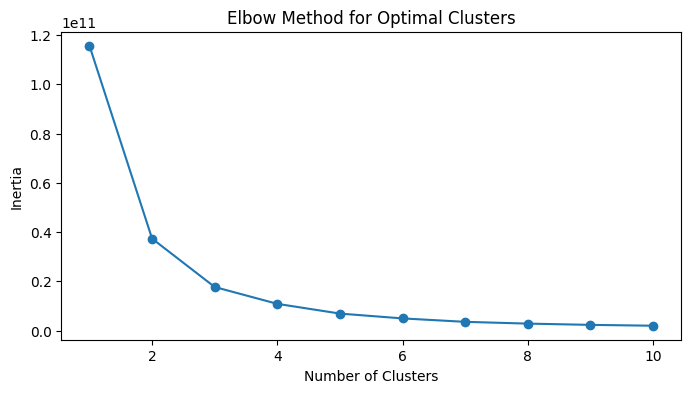

In [30]:
# Plotting the elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [31]:
# Choosing the number of clusters
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_reduced)

/Users/aryan/anaconda3/envs/asdrp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
# Adding the cluster labels to the original DataFrame
df['cluster'] = clusters

5b. __Show the first 2 rows of each cluster__ to check your work.<br>
Each cluster output should be 2 rows of a DataFrame that has all the columns of the DataFrame in step 2b.

In [33]:
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster].head(2))
    print()

Cluster 0:
  cust_id     balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001   40.900749           0.818182       95.4               0.0   
4  C10005  817.714335           1.000000       16.0              16.0   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4           0.0             0.166667   
4                     0.0           0.0             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                     0.0                 0              2        1000.0   
4                     0.0                 0              1        1200.0   

     payments  minimum_payments  prc_full_payment  tenure  cluster  
0  201.802084        139.509787               0.0      12        0  
4  678.

---

6. Analyze and interpret the clusters.<br>

6a. __Create a DataFrame of the mean of each column of the clusters__.<br>

Example: if you have 5 clusters, the resulting DataFrame will have 5 rows.<br>
Each row will have 17 columns, which is the number of columns in the DataFrame of step 2b, but not counting the customer id column.<br>
Each column value of the resulting DataFrame is the mean of that column in the cluster.

_Hint: Since there are a only a few clusters, it's fastest to go through each cluster and find the means of the columns and store the result in a list. Then convert the list into a DataFrame._

Then __print the resulting DataFrame__ of the means of the clusters.

In [34]:
cluster_means = []

# Iterate through each cluster
for cluster in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster].drop(columns=['cluster'])
    cluster_mean = cluster_data.mean()
    cluster_means.append(cluster_mean)

# Convert the list to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

print("DataFrame of the means of each cluster:")
print(cluster_means_df)


DataFrame of the means of each cluster:
       balance  balance_frequency    purchases  oneoff_purchases  \
0   672.412595           0.881795   449.695581        213.799343   
1  3059.357969           0.941681  1513.115976        967.728974   
2  4383.668908           0.946866  2347.430325       1579.880144   
3  1065.259693           0.875526   660.029981        341.776320   
4  6111.056021           0.893634  6226.554605       4115.128158   
5  1879.934904           0.898793  1176.053567        680.925621   
6  3335.404022           0.930683  1898.208645       1225.034606   
7  4934.752275           0.927673  3572.266707       2363.151198   
8  1329.855413           0.881195   986.106165        576.763042   
9  2110.845507           0.921492  1447.516028        891.257528   

   installments_purchases  cash_advance  purchases_frequency  \
0              236.237858    351.276844             0.454147   
1              545.485594   2098.279246             0.503381   
2              767.

/var/folders/zg/8nkv6yr17qq1t72f3xfzhwrm0000gp/T/ipykernel_40144/273783139.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_mean = cluster_data.mean()
/var/folders/zg/8nkv6yr17qq1t72f3xfzhwrm0000gp/T/ipykernel_40144/273783139.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cluster_mean = cluster_data.mean()
/var/folders/zg/8nkv6yr17qq1t72f3xfzhwrm0000gp/T/ipykernel_40144/273783139.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In

6b. Observing the means of each cluster shown in the DataFrame of step 6a,<br>
__compare the characteristics of each cluster__ in terms of the behavior of the customers:<br>

- Rank the clusters by credit limit
- Which cluster has a high ratio of balance / credit limit? Use a code cell to do the calculation and print the result.
- Which cluster has more overall purchase _transactions_ than cash_advance _transactions_?<br>
Does this fit with the pattern of how people use credit cards?
- Compare the prc_full_payment (percent full payment or how much of their payments are paying the credit card balance in full) among the clusters.<br>
How is this related to the prc_full_payment distribution?
- Compare the tenure (how long the customers own the credit card) among the clusters.<br>
How is this related to the tenure distribution?

_Create a Raw NBConvert cell to answer each of the 5 questions_.<br>

6c. The credit card company CFO wants to increase the credit limit for the customers that most likely will use the credit card more as a result of a higher credit limit.

Create a Raw NBConvert cell to show __which cluster of customers would you recommend, and why__?<br>
_Your answer should be based on your output and observation above_.